# Assignment 3 (BONUS): Neural Networks and Backpropagation

This bonus assignment has **100 marks (2% Bonus Mark on top of your final grades)**.
 

**Deadline: April 4 at 11:59PM**


We will cover a neural networks and backpropgation. It has only 1 problem.

Please note that similar codes between individuals will considered violation under the academic integrity policy, and the instructor holds the right to take any necessarry action.

## Note
* Use Google Colab to do this assignment. 
* Don't change existing code or text. You can modify some part of the given code by copying them to another array but the main thing is to answer the question with the exact given we give.
* Add code and write text as instructed.
* Please pay attention to questions asked after writing code to analyze or conclude results (I usually put them in bullet points and bold them)

## Submission
* File > Download > (as .ipynb)
* Submit .ipynb file on the Learn.
* Please submit by April 4.


# Question 1 - Neural Networks (100 points)

In this question, we will build a neural network using only NumPy. It will have a ReLU hidden layer and a sigmoid output layer used for classification. We will implement the backward and forward pass as discussed during the lecture.

## Part 1: Training and Testing dataset
The most important aspect of any neural network is training and testing data. We are given 8x8 images of handwritten digits from 0-9, and we will predict the digit. First, we will normalize the images. We will solve it as classification problem.  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# DON'T CHANGE THE NORMALIZATION

digits = load_digits()

train_x = digits.data[:320]/255.
train_y = np.expand_dims(digits.target[:320], axis=1)
print(train_x.shape)
print(train_y.shape)

test_x = digits.data[320:352]/255.
test_y = np.expand_dims(digits.target[320:352], axis=1)

(320, 64)
(320, 1)


## Part 2: Building a Neural Network
- We will build a 2 hidden-layered neural network (number of neurons per layer is a hyper parameter)
- The hidden layer uses ReLU activation. This is the modification from the network presented in Lecture 10
- The output layer will be a single neuron sigmoid for the classifier.
- The loss function used for training will be the squared loss function.
- We remove the bias from each neuron for simplicity

**Step 1:** We will define the list of important functions. I give you some of them which I implemented in the lecture and you will need to implement (**8 points**):



1.   ReLU
2.   Derivative of ReLU (its backward pass)

In [4]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

# ADD the ReLU
def ReLU(x):
    return np.maximum(0, x)

# ADD the derivatives sigmoid and ReLU as defined in the lecture and in the lecture code.
def sigmoid_derivative(x): # you can add more input parameters if you want
    return np.multiply(x, (1 - x))

def ReLU_derivative(x): # you can add more input parameters if you want
    return 1 * (x > 0)

# Two ways to write the derivative functions

# Option - 1 : pass only x as the input parameter
# return derivative of x and do the multiplication with the backward gradients of that layer inside the backprop function

# Option - 2 : pass both x and backwards_grad as the input parameters
# return the product of backwards_grad and derivative of x

**STEP 2:** Lets first define the 2-layers NN. **(15 marks)** 
- Add initialization yourself 
- We have added a zero initialization (which in practice is really bad)
- Try random uniform between [-1/n_in, 1/n_in] or as I did in the lecture
- Define the forwardpass and build the 2-layer NN

In [17]:
step_size = 0.1
reg = 1e-3 # regularization strength
epochs = 100000
N = train_y.size
 
# Input features
input_size = 64
 
# Hidden layer neurons
hidden_size = 8
 
# Output layer
output_size = 1
 
results = pd.DataFrame(columns=["mse", "accuracy"])

np.random.seed(42)
# Hidden layer
W1 = np.zeros((input_size, hidden_size))
W1 = 2.0 * np.random.random((input_size, hidden_size)) - 1
# # Output layer
W2 = np.zeros((hidden_size , output_size))
W2 = 2.0 * np.random.random((hidden_size , output_size)) - 1

# You can pass the input and weights for each layer if you want as you defined them above. You can modify this function as you want.
def forward_propagation(train_x, W1, W2):
    layer1=ReLU(np.dot(train_x, W1))
    #print("layer1 ", layer1.shape)
    output=sigmoid(np.dot(layer1, W2))
    #print("output ", output.shape)
    return layer1, output

**STEP 3:** Calculate the loss (**2 points**):

- Loss is defined as the squared loss


In [23]:
def loss_f(y_true, y_pred):
    error = ((y_pred - y_true)**2).sum()/(y_pred.size)
    return error

**STEP 4: Draw the Computational Graph** **(25 points)**

Summary of Backward Pass: each layer computes two gradients $\frac{\partial y}{\partial x}$ and $\frac{\partial y}{\partial w}$, where $y$ is output of the layer, $x$ is the input of the layer, and $w$ are parameters of the layers. The layer passes the $\frac{\partial y}{\partial x}$  on to the previous layer and uses $\frac{\partial y}{\partial w}$ to updates its own parameters. We saw that we can either solve it analytically or using computational graphs. **In this assignment you will use computational graphs.**

**Note:** We have already coded the backward pass for a similar network with a sigmoid activation function instead.

**Draw the computational graph for this network**. You can hand sketch it, or use any software to draw it. **Upload a scan image of your solution here.** DO NOT SUBMIT IT in a different document. Show all necessary steps for partial marks including the math. The name of the variables used in the graph should be the same as you use in your code.

**UPLOAD SOLUTION HERE:**

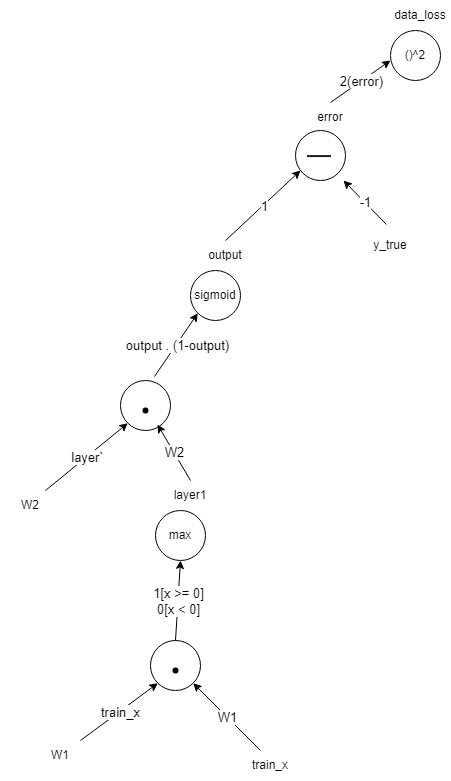

**STEP 5:** Calculate the backward pass (**25 points**)
- Revise the lecture
- Parameter of each layer updated as: gradients (from the connected layer) * gradients of the layer operations. Use the computational graph from the previous step
- Fill the `backward_propagation` function
- Calculate the gradient of the error function w.r.t to the `forward_propagation` score. We did that in class now you have to do it using ReLU hidden layer. 
- **Apply the gradient descent as the gradient update step**

In [26]:
def back_propagation(output, layer1, y_train, W1, W2):
    ## Backpropagate into parameter W2
    E1 = 2.0 * (output - y_train)
    #print("E1 ", E1.shape)
    #s0 = np.multiply(output, (1 - output))
    s0 = sigmoid_derivative(output)
    #print("S0 ", s0.shape)
    s1 = np.multiply(s0, E1)
    #print("S1 ", s1.shape)
    dW2 = np.dot(layer1.T, s1)
    #print("dW2 ", dW2.shape)
    ## Backpropagate into parameter W1
    #s2 = max(0, layer1)
    s2 = ReLU_derivative(layer1)
    #print("s2 ", s2.shape)
    s3 = np.dot(s1, W2.T)
    #print("s3 ", s3.shape)
    s4 = np.multiply(s3, s2)
    #print("s4 ", s4.shape)
    dW1 = np.dot(train_x.T, s4)
    #print("dW1 ", dW1.shape)
    return dW1, dW2

**STEP 6: (5 points)** Train the network
- Change the hyperparameters LR, reg, epochs, etc....
- Build the training model using the functions in all the previous steps

In [27]:
#----------------------Training Starts-----------------------------#
for i in range(epochs):
    ## Forward pass
    layer1, output = forward_propagation(train_x, W1, W2)
    ## Compute the squared loss
    data_loss = loss_f(train_y, output)
    acc = accuracy(output, train_y)
    
    reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
#     print("data_loss ", data_loss)
#     print("reg_loss ", reg_loss)
#     print("i ", i)
#     print("loss ", loss)
    if i % 10000 == 0:
        print("iteration %d: loss %f" % (i, loss))
    ## Backward pass
    #print("W1 ", W1.shape)
    #print("W2 ", W2.shape)
    #print("train_y ", train_y.shape)
    #print("output (scores) ", output.shape)
    dW1, dW2 = back_propagation(output, layer1, train_y, W1, W2)
    ## Add regularization
    dW2 += reg * W2
    dW1 += reg * W1
    
    ## Perform parameter update
    W1 += -step_size * dW1
    W2 += -step_size * dW2

iteration 0: loss 20.233931
iteration 10000: loss 20.213737
iteration 20000: loss 20.211068
iteration 30000: loss 20.210710
iteration 40000: loss 20.210662
iteration 50000: loss 20.210656
iteration 60000: loss 20.210655
iteration 70000: loss 20.210655
iteration 80000: loss 20.210655
iteration 90000: loss 20.210655


**STEP 7: (5 points)** Test the network
- Fill the prediction function to take an test input and apply the trained model on it
- Test on all testing data
- Report the accuracy

In [30]:
def predict(x, W1, W2): # you can add more input parameters if you want
    hidden_layer = ReLU(np.dot(x, W1))
    scores = sigmoid(np.dot(hidden_layer, W2))
    return scores

# def accuracy(x): # you can add more input parameters if you want
#     accuracy()
predicted_scores = predict(test_x, W1, W2)
acc = accuracy(predicted_scores, test_y)
print("Accuracy on test data: ", acc)

Accuracy on test data:  1.0


## Part 3 - Tensorflow/Keras Implementation (15 points)




Using tensorflow or Keras (like we did in tutorial 9). For this network do the following experiments:



*   Start with Implement the same exact network we did in part 1 i.e. hidden layer with ReLU and one output layer using sigmoid for classification. Use SGD as optimizer and the squared loss.
*   Change the ReLU to sigmoid and report the accuracy
*   Try Adam optimizer and report the accuracy
*   Change the loss function to softmax and report the accuracy



In [31]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Building the Neural Network
network = models.Sequential()
# create additional hidden layers
network.add(layers.Dense(8, activation = 'relu'))
# create output layer
network.add(layers.Dense(1, activation = 'sigmoid'))

# Compile Neural Network
model.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train Neural Network
model.fit(train_x, train_y,)

# Test Neural Network
loss, accuracy = model.evaluate(test_x, test_y)

ModuleNotFoundError: No module named 'tensorflow'

Tabulate the results for the 4 experiments and add to it the results from step 7 in part 1. To generate tables you can use the code I am providing you below and modify the way you want to present it and add as many columns and rows you need. Or you can also use this nice website to create it and save it as image to put it here: https://www.tablesgenerator.com/latex_tables

\begin{array}{ccc} \hline
Experiment Type & Validation Accuracy & Testing Accuracy \\ \hline
SGD Network & 0.75 & 0.8 \\
\end{array}

Discuss the results and comment what was the best loss function and optimizer to use. (2-3 sentences)

**write your answer here**



Compare the results from this part to part 1 and make your conclusions. (2-3 sentences)

**write your answer here**